In [3]:
import pandas as pd

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_submission_df = pd.read_csv('gender_submission.csv')

In [5]:
print("First row:")
print(train_df.head().to_markdown(index=False, numalign="left", stralign="left"))

First row:
| PassengerId   | Survived   | Pclass   | Name                                                | Sex    | Age   | SibSp   | Parch   | Ticket           | Fare    | Cabin   | Embarked   |
|:--------------|:-----------|:---------|:----------------------------------------------------|:-------|:------|:--------|:--------|:-----------------|:--------|:--------|:-----------|
| 1             | 0          | 3        | Braund, Mr. Owen Harris                             | male   | 22    | 1       | 0       | A/5 21171        | 7.25    | nan     | S          |
| 2             | 1          | 1        | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female | 38    | 1       | 0       | PC 17599         | 71.2833 | C85     | C          |
| 3             | 1          | 3        | Heikkinen, Miss. Laina                              | female | 26    | 0       | 0       | STON/O2. 3101282 | 7.925   | nan     | S          |
| 4             | 1          | 1        | Futrelle, Mrs. Jacques

In [6]:
print("\nData Trained Info:")
print(train_df.info())


Data Trained Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
print("\nTesting:")
print(test_df.info())


Testing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


In [8]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

In [9]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [11]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [12]:
import numpy as np

In [13]:
train_df['IsChild'] = np.where(train_df['Age'] < 18, 1, 0)
print(train_df[['Age', 'IsChild']].head())

    Age  IsChild
0  22.0        0
1  38.0        0
2  26.0        0
3  35.0        0
4  35.0        0


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
sns.set_style("whitegrid")

<Axes: xlabel='Sex', ylabel='Survived'>

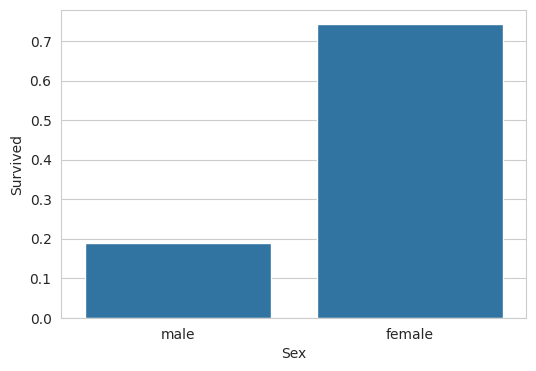

In [17]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=train_df, errorbar=None)

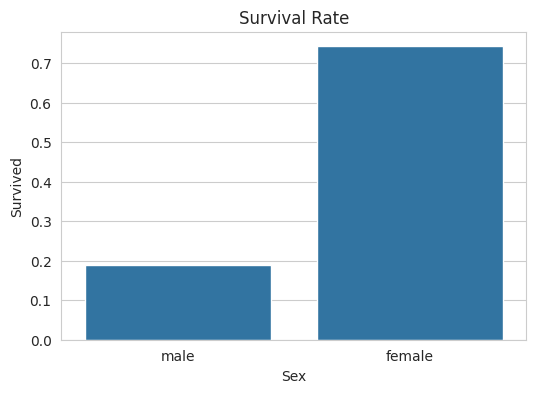

In [19]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=train_df, errorbar=None)
plt.title('Survival Rate')
plt.savefig('survival_rate.png')

<Axes: xlabel='Pclass', ylabel='Survived'>

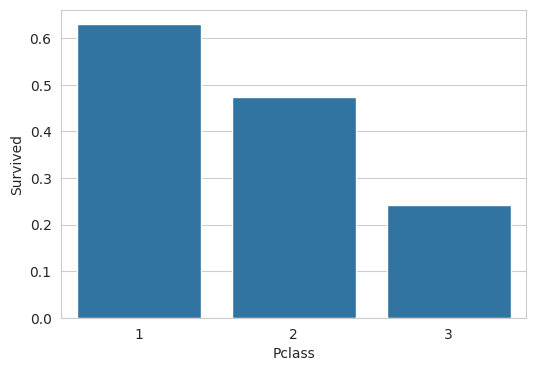

In [20]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=train_df, errorbar=None)

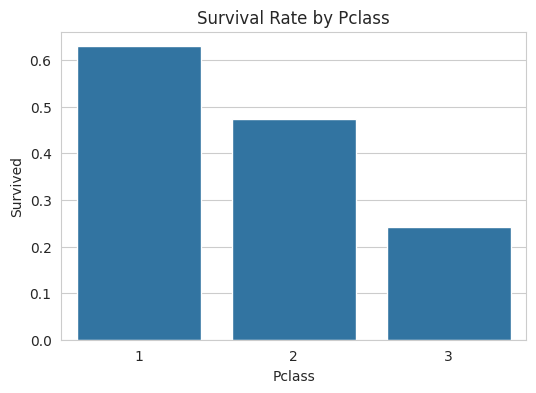

In [21]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=train_df, errorbar=None)
plt.title('Survival Rate by Pclass')
plt.savefig('survival_pclass.png')